# Taxpayer Risk Classification Project

## Project Overview

In many countries, tax evasion and non-compliance significantly reduce government revenue needed for critical services like education, infrastructure, and healthcare. While some taxpayers follow rules diligently, others exploit system loopholes or avoid taxes altogether.
Manual audit selection methods often depend on human judgment and limited resources, leading to inefficiencies and unfair targeting. However, by leveraging taxpayer data  such as revenue, expenses, filing behavior, and industry machine learning can help authorities flag potential high risk taxpayers more accurately. This enables smarter enforcement, early detection of risk, and a fairer tax ecosystem.

---

## Business Problem
Tax authorities face significant challenges in efficiently identifying taxpayers who are at high risk of non compliance or tax evasion. Without accurate risk profiling, audits and enforcement actions may be misallocated, leading to revenue losses and wasted resources. There is a need for a data driven approach to classify taxpayers based on their risk levels, enabling focused compliance efforts.
The challenge is to determine whether this existing taxpayer data can be used to **accurately classify taxpayers as high or low risk**, enabling smarter audit selection, reducing the burden on compliant taxpayers, and improving overall compliance.

> **How can we leverage taxpayer financial and behavioral data to automatically and accurately classify taxpayers by risk level, in order to support targeted audits, enhance compliance monitoring, and increase tax revenue efficiency?**

---

## Stakeholders
| Stakeholder             | Role / Interest                                                                                 |
|------------------------|------------------------------------------------------------------------------------------------|
| **Tax Authority / Revenue Service**| Responsible for tax collection, compliance enforcement, and overall revenue maximization.    |
| **Audit Teams**            | Use risk classifications to prioritize audits and investigations for efficient resource use.   |
| **Policy Makers**           | Use insights from the model to improve tax regulations and compliance strategies.               |
| **Taxpayers**               | Subject to audits and compliance monitoring; directly impacted by classification outcomes.     |
| **Data Analysts / Data Scientists** | Develop, validate, and maintain predictive models, providing actionable insights to stakeholders |

---

## Business Objectives
1. **How can we improve audit efficiency by prioritizing audits on high-risk taxpayers to reduce costs and increase revenue recovery?**

2. **How can we develop a predictive model to categorize taxpayers by risk level (Low, Medium, High) for ongoing compliance monitoring and early intervention?**

3. **How can we proactively identify potential non-compliant taxpayers to reduce tax evasion and maximize government revenue?**

---

## Analysis Objectives
- **How can we build and validate a machine learning classification model that accurately predicts the risk label of taxpayers based on their financial and behavioral features?**

- **Which features (e.g., revenue, expenses, late filings) most significantly influence the taxpayer risk classification and how can these insights inform targeted policy actions?**

---
## Data Understanding

We will use taxpayer financial and behavioral data to build a predictive model. The dataset includes records of individual and business taxpayers, featuring approximately **1000** observations and **13** columns.

### Data  Description
| Column Name          | Description                                                                                       | Data Type              |
|----------------------|---------------------------------------------------------------------------------------------------|------------------------|
| `Taxpayer_ID`          | Unique identifier for each taxpayer                                                               | Categorical (ID)       |
| `Revenue`              | Total revenue reported by the taxpayer over a specific period                                     | Numeric (Continuous)   |
| `Expenses`            | Total expenses declared by the taxpayer                                                           | Numeric (Continuous)   |
| `Profit`              | Net profit calculated as Revenue minus Expenses                                                   | Numeric (Continuous)   |
| `Industry_Type`        | Sector in which the taxpayer operates (e.g., Retail, Manufacturing)                              | Categorical            |
| `Business_Age`        | Number of years the business has been operating                                                   | Numeric (Discrete)     |
| `Late_Filings`        | Number of late tax return submissions                                                              | Numeric (Discrete)     |
| `Audit_History`        | Count of previous audits conducted on the taxpayer                                                | Numeric (Discrete)     |
| `Payment_Delays`       | Number of instances where tax payments were delayed                                               | Numeric (Discrete)     |
| `Employee_Count`      | Number of employees reported by the business                                                      | Numeric (Discrete)     |
| `Compliance_Score`     | Internal score indicating taxpayer’s level of compliance (e.g., 0–100 scale)                      | Numeric (Continuous)   |
| `Region`               | Geographical location or jurisdiction of the taxpayer                                             | Categorical            |
| `Risk_Label`         | Target variable: classification of the taxpayer’s compliance risk (Low, Medium, High)            | Categorical (Target)   |



### Data Overview

Key features in the dataset include:

- **Demographics** – Taxpayer ID, age, industry, location.
- **Financial Data** – Reported revenue, deductible expenses, net income.
- **Behavioral Data** – Filing frequency, past audits, late submissions, and penalties.
- **Risk Labels** – Historical classification as high, medium, or low risk (target variable).

### Data Exploration Approach

To extract actionable insights and ensure data quality, we will:

- Load and inspect the dataset to understand its structure and feature types
- Handle missing values through imputation or removal depending on the nature and distribution
- Explore relationships between taxpayer behavior and risk level
- Visualize trends, outliers, and class imbalance (if any) before modeling


## Prediction Target
We are predicting the **Taxpayer Risk Label**, which categorizes taxpayers into different risk levels **Low**, **Medium**, or **High** risk of non-compliance or tax evasion based on their financial data and compliance behavior. This classification helps tax authorities prioritize audits and enforcement actions effectively


# Import modules & packages

In [1]:
# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

# Modeling
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,auc,classification_report # performance metrics
from sklearn.preprocessing import StandardScaler# to scale the numeric features
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler # to encode binary features
from scipy import stats

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


# Set the style to "darkgrid" and "ggplot"
sns.set_style("dark")

# Load Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Harriet\Downloads\PHASE 3 PROJECT\data\tax_risk_dataset.csv")
data.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


# EXPLORATORY DATA ANALYSIS

## DATA INSPECTION

In [3]:
print("\n Column names:")
print(data.columns.tolist())

print("\n Data types and non-null counts:")
print(data.info())

print("\n Summary statistics (numerical columns):")
print(data.describe())

print("\n Preview of the first 5 rows:")
print(data.head())

print("\n Preview rows and columns:")
print(data.shape)


 Column names:
['Taxpayer_ID', 'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings', 'Compliance_Violations', 'Industry', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio', 'Risk_Label']

 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Taxpayer_ID            1000 non-null   int64  
 1   Revenue                1000 non-null   float64
 2   Expenses               1000 non-null   float64
 3   Tax_Liability          1000 non-null   float64
 4   Tax_Paid               1000 non-null   float64
 5   Late_Filings           1000 non-null   int64  
 6   Compliance_Violations  1000 non-null   int64  
 7   Industry               1000 non-null   object 
 8   Profit                 1000 non-null   float64
 9   Tax_Compliance_Ratio   1000 non-null   float64
 10  Audit_

## DATA PREPARATION

### Checking for missing, duplicated and placeholder values.

We will begin the data cleaning by checking for missing, duplicated and placeholder values in the dataset. One function will be used to check for them.

In [4]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.

def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
# Checking in our dataset.
data_prep(data)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
Taxpayer_ID              0
Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Audit_to_Tax_Ratio       0
Risk_Label               0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'Taxpayer_ID'
Placeholders found: []
Count of placeholders: 0

Column: 'Revenue'
Placeholders found: []
Count of placeholders: 0

Column: 'Expenses'
Placeholders found: []
Count of placeholders: 0

Column: 'Tax_Liability'
Placeholders found: []
Count of placeholders: 0

The dataset has no missing,duplicated or placeholder values

Let's check if the dataset has any outliers and decide on whether to drop or keep them

In [5]:
# Creating a function that checks for outliers in the dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

Taxpayer_ID
Number of outliers: 0

Revenue
Number of outliers: 8

Expenses
Number of outliers: 8

Tax_Liability
Number of outliers: 10

Tax_Paid
Number of outliers: 5

Late_Filings
Number of outliers: 0

Compliance_Violations
Number of outliers: 0

Profit
Number of outliers: 5

Tax_Compliance_Ratio
Number of outliers: 51

Audit_Findings
Number of outliers: 0

Audit_to_Tax_Ratio
Number of outliers: 0



The dataset has a few outliers so let's try to visualize them

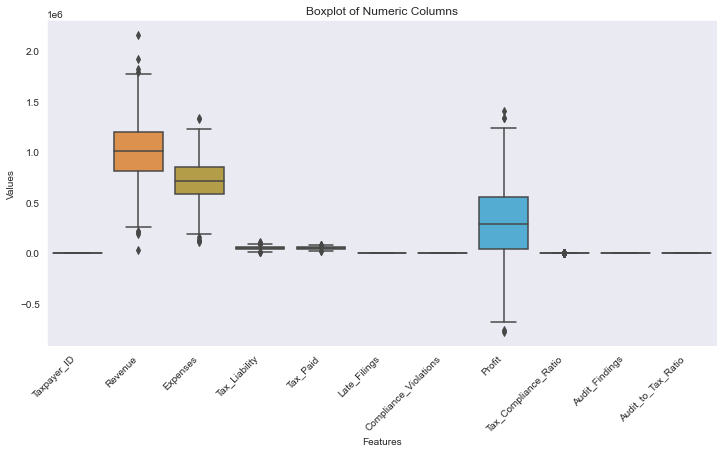

In [6]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

We will choose to retain them rather than drop them

# Data Preprocessing

In [7]:
data.columns

Index(['Taxpayer_ID', 'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
       'Late_Filings', 'Compliance_Violations', 'Industry', 'Profit',
       'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio',
       'Risk_Label'],
      dtype='object')

### Handling the Target Variable (`Risk_Label`)

- For binary classification let's filter the dataset to keep only the rows where the `Risk_Label` is either **"Low"** or **"High"**
- This ensures that only relevant classes are included in the analysis
  
- Let's manually map the categorical labels to numeric values:
  - `"Low"` is mapped to `0`
  - `"High"` is mapped to `1`

This numeric encoding is necessary for most machine learning algorithms that require numerical inputs, and mapping `"High"` to `1` clearly indicates it as the positive/high-risk class in the classification problem




In [8]:
data = data[data["Risk_Label"].isin(["Low", "High"])]
data["Risk_Label"] = data["Risk_Label"].map({"Low": 0, "High": 1})


Let's now do a value count of the Risk Label column to see if the rows have 0 and 1

In [9]:
data["Risk_Label"].value_counts()

1    736
0    152
Name: Risk_Label, dtype: int64

# Analyzing the target variable 

1    736
0    152
Name: Risk_Label, dtype: int64


Text(0, 0.5, 'Count')

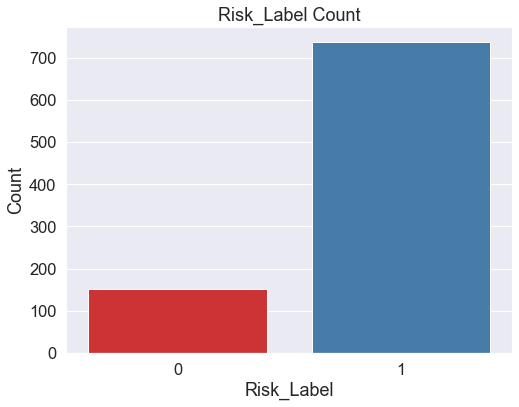

In [10]:
# Display value counts of unique items
print(data['Risk_Label'].value_counts())

# Set custom font parameters
sns.set(font_scale=1.5)
colors = sns.color_palette("Set1")
# Create a countplot of the 'Risk label' feature
plt.figure(figsize=(8, 6))  
sns.countplot(x='Risk_Label', data=data, palette=colors)
plt.title("Risk_Label Count")
plt.xlabel("Risk_Label")
plt.ylabel("Count")

# Check Class Imbalance

In [11]:
# Class frequency of target variable 
print(data['Risk_Label'].value_counts())
print()
print(data['Risk_Label'].value_counts(normalize = True))

1    736
0    152
Name: Risk_Label, dtype: int64

1    0.828829
0    0.171171
Name: Risk_Label, dtype: float64


- Let's use a pie chart to visualize the classes 

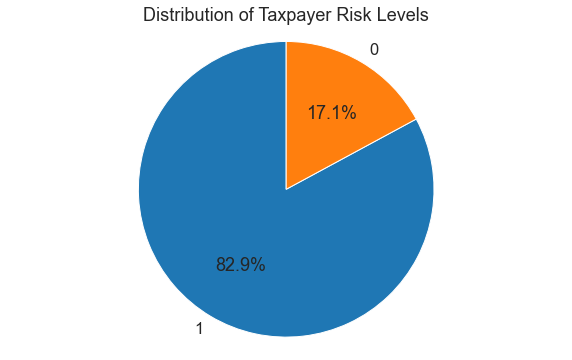

In [12]:
# Create a pie chart to visualize the Risk label
risk_counts = data['Risk_Label'].value_counts()
import seaborn as sns
colors = sns.color_palette('tab10', n_colors=len(risk_counts))
plt.figure(figsize=(10, 6))
plt.pie(risk_counts, 
        labels=risk_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors= colors)
plt.title('Distribution of Taxpayer Risk Levels')
plt.axis('equal')
plt.show()

- The target variable, Risk_Label, is imbalanced with 82.9% high risk (1) and 17.1% low risk (0) taxpayers. 
- This imbalance can cause models to favor the majority class, so we will use SMOTE technique  and appropriate evaluation metrics to correct the imbalance

# Correlation matrix for all the Numeric columns 

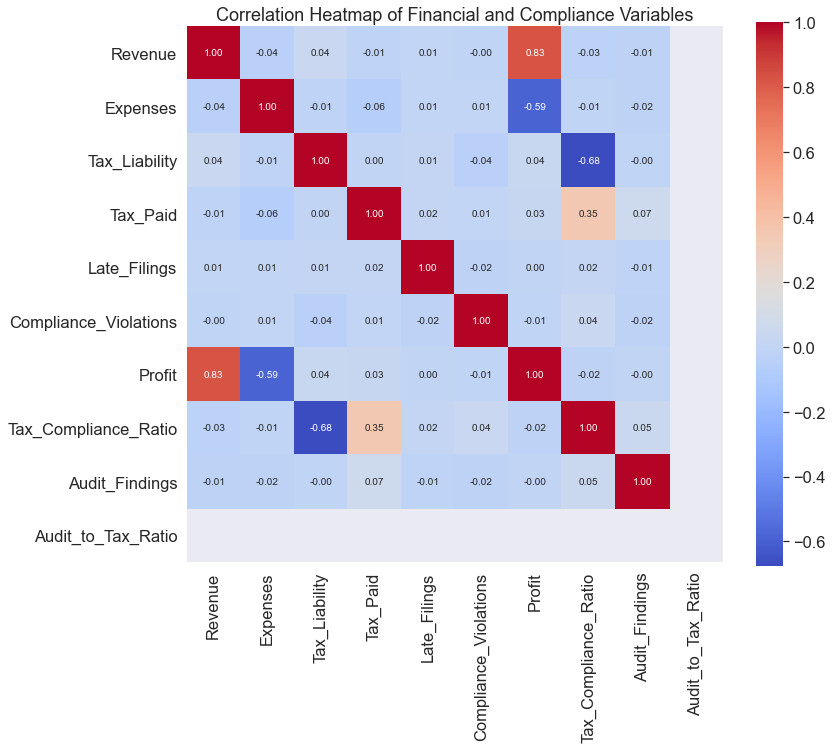

In [13]:
# Define numeric features from your dataset
numeric_features = [
    'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
    'Late_Filings', 'Compliance_Violations', 'Profit',
    'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio'
]

# Calculate correlation matrix
correlation_matrix = data[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            square=True,
            fmt=".2f",
            annot_kws={"size": 10})
plt.title("Correlation Heatmap of Financial and Compliance Variables")
plt.show()


# PREDICTIVE MODELLING

# DATA PREPROCESSING

## Define the features

In [14]:
# Define X and y
X = data.drop(columns=['Taxpayer_ID', 'Risk_Label'])
y = data['Risk_Label']

We dropped Taxpayer_ID because it is a unique identifier for each individual and does not provide any predictive value for determining risk level. Including it in the model could lead to overfitting or noise, as it simply identifies a record rather than describing any meaningful behavior or financial attribute

# Identify numerical and categorical columns

In [15]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(numerical_cols)
print()
print(categorical_cols)

['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings', 'Compliance_Violations', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio']

['Industry']


# Train Test Split

In [16]:
## Create training and test sets
SEED = 42
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state = SEED)

In [17]:
X_train.shape ,X_test.shape

((621, 11), (267, 11))

## Encode categorical data as numbers

Since all of our data  has some  categorical columns , we need to encode them as numbers using sklearn's `preprocessing` module  `OneHotEncoder`

In [18]:
# Define features explicitly based on your columns
numeric_features = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings',
                    'Compliance_Violations', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio']

categorical_features = ['Industry']  


# One-hot encode categorical features in X_train
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = ohe.fit_transform(X_train[categorical_features])
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_features), index=X_train.index)

# Scale numeric features in X_train
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numeric_features])
num_df = pd.DataFrame(X_train_num_scaled, columns=numeric_features, index=X_train.index)

# Combine numeric and categorical features for X_train
X_train_processed = pd.concat([num_df, ohe_df], axis=1)

# Show resulting DataFrame after preprocessing
X_train_processed.head()


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech
539,-0.606654,-2.898203,0.027772,-0.135519,1.280228,-0.123269,1.131685,-0.281619,0.917179,0.0,1.0,0.0,0.0,0.0
324,-1.044140,-0.002580,-0.033320,1.076561,-1.419335,-0.123269,-0.847985,0.206433,-1.465951,0.0,0.0,0.0,0.0,0.0
192,0.199741,-0.659101,2.015430,2.205747,1.280228,-0.123269,0.532095,-0.335847,0.236285,0.0,1.0,0.0,0.0,0.0
500,0.925698,0.701312,0.548238,1.150158,-1.419335,-0.123269,0.359805,-0.082783,1.598074,0.0,0.0,0.0,0.0,0.0
397,1.361726,-1.024164,-1.040949,1.445904,-1.419335,-1.338355,1.682111,1.327147,-0.444610,0.0,0.0,0.0,1.0,0.0


In [19]:
# Apply SMOTE after preprocessing to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)



In [20]:
# check class distribution before and after
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({1: 520, 0: 101})
After SMOTE: Counter({1: 520, 0: 520})


In [21]:
# Preprocess X_test using fitted transformers
X_test_ohe = ohe.transform(X_test[categorical_features])

# Create DataFrame with proper column names for X_test
ohe_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_features), index=X_test.index)

# Scale numeric features in X_test using the fitted scaler
X_test_num_scaled = scaler.transform(X_test[numeric_features])

# Convert scaled numeric features back to DataFrame
num_test_df = pd.DataFrame(X_test_num_scaled, columns=numeric_features, index=X_test.index)

# Combine scaled numeric features and one-hot encoded categorical features for X_test
X_test_processed = pd.concat([num_test_df, ohe_test_df], axis=1)
# Show resulting DataFrame after preprocessing X_test
X_test_processed.head()


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech
311,1.101660,0.740166,1.784205,0.449156,1.280228,1.091816,0.481167,-0.697368,-1.465951,0.0,0.0,0.0,0.0,1.0
482,-1.656267,1.636635,1.983341,-0.328180,0.605337,-1.338355,-2.265180,-0.914280,-0.444610,0.0,0.0,1.0,0.0,0.0
42,-0.136425,0.997427,-0.556626,-0.544109,-0.744445,-1.338355,-0.670308,-0.118935,0.236285,0.0,0.0,0.0,0.0,0.0
463,0.199625,-0.904765,-1.276824,0.999530,-0.744445,1.091816,0.669761,1.417527,-0.785057,0.0,1.0,0.0,0.0,0.0
659,-0.165696,1.057768,0.530716,2.139478,-0.744445,1.091816,-0.727958,0.242585,-0.785057,0.0,0.0,0.0,0.0,1.0


In [22]:
#  